**1) Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as statm
from sklearn.preprocessing import LabelEncoder
import copy

**2) Reading the data as a data frame**

In [2]:
Ins = pd.read_csv('insurance.csv')

In [3]:
Ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**3) Basic EDA**

**3.a) Shape of the data**

In [4]:
Ins.shape

(1338, 7)

*The dataset has 1338 rows and 7 columns.*

**3.b) Data type of each attribute**

In [5]:
Ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*The attribute 'sex','smoker' and 'region' is of type object, rest all other attributes are of int and float type. Also, all the attributes have no-null data.*

**3.c) Checking the presence of missing values**

In [6]:
Ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*There is no missing values in the dataset.*

**3.d) 5 point summary of numerical attributes**

In [7]:
Ins[["age", "bmi", "children", "charges"]].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*As per above summary 'age' data representes adult population.*

*Very few people have more than 2 children. 75% of the people have 2 or less children.*

*75% people have bmi between 30 to 35.*

*Charges are highly-skewed as most people would require basic medi-care and only few suffer from diseases.*

**3.e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns**

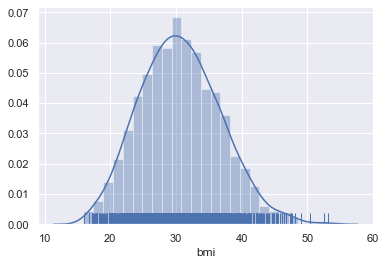

In [8]:
sns.distplot(Ins['bmi'], kde=True, rug=True)

*The bmi is in a considerable good shape not much left skewness is present.Very less people with lower bmi exists in the dataset.*

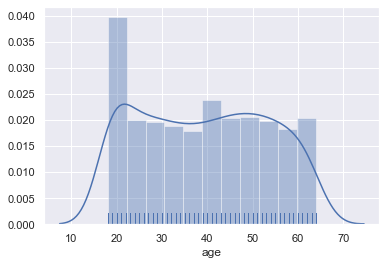

In [9]:
sns.distplot(Ins['age'], kde=True, rug=True)

*Age tells highest participation is done by the age around 20yrs old customers. Though the data is very very slightly more for higher age people is present.*

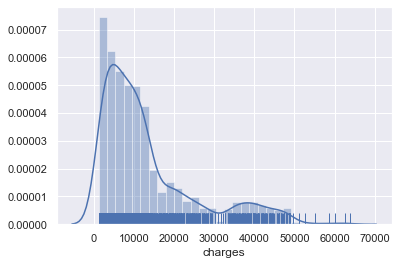

In [10]:
sns.distplot(Ins['charges'], kde=True, rug=True)

*Charges are highly left skewness in the dataset tells lmostly less individual medical costs is billed by health insurance.*

**3.f) Skewness of ‘bmi’, ‘age’ and ‘charges’ columns**

In [11]:
skewness = pd.DataFrame({'Skewness' : [stats.skew(Ins.bmi),
                                       stats.skew(Ins.age),
                                       stats.skew(Ins.charges)]},
                         index = ['bmi', 'age', 'charges'])
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


*The 'bmi' column is slightly skewed.*

*The 'age' column is normally distributed and very little skewed.*

*The 'charges' column is highly skewed.*

**3.g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges'**

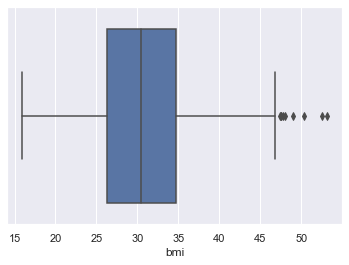

In [12]:
sns.boxplot(Ins["bmi"])

In [13]:
#Identify outliers in bmi
q1 = Ins["bmi"].quantile(0.25)
q3 = Ins["bmi"].quantile(0.75)
bmi_IQR = q3 - q1
bmi_IQR

lower_fence = q1 - (1.5 * bmi_IQR)
upper_fence = q3 + (1.5 * bmi_IQR)

outliers = Ins[((Ins["bmi"]<lower_fence)|(Ins["bmi"]>upper_fence))] #Outlier data based on the bmi column
outliers
print("Outliers for bmi column out of 1338 records :",len(outliers))

Outliers for bmi column out of 1338 records : 9


*The 'bmi' column is approximately normally distributed with few outliers. It shows that very less people have higher bmi than range of average people.*

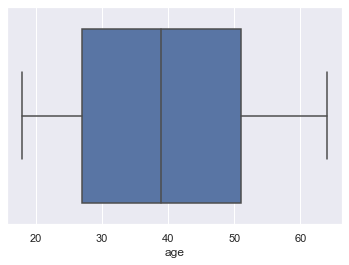

In [14]:
sns.boxplot(Ins["age"])

In [15]:
#Identify outliers in age
q1 = Ins["age"].quantile(0.25)
q3 = Ins["age"].quantile(0.75)
age_IQR = q3 - q1
age_IQR

lower_fence = q1 - (1.5 * age_IQR)
upper_fence = q3 + (1.5 * age_IQR)

outliers = Ins[((Ins["age"]<lower_fence)|(Ins["age"]>upper_fence))] #Outlier data based on the age column
outliers
print("Outliers for age column out of 1338 records :",len(outliers))

Outliers for age column out of 1338 records : 0


*The 'age' column is normally distributed and there is no outliers present in 'age' column.*

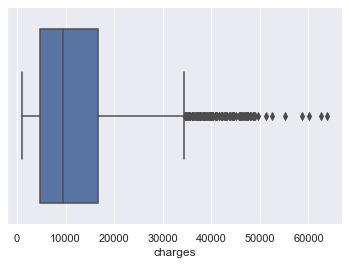

In [16]:
sns.boxplot(Ins["charges"])

In [17]:
#Identify outliers in charges
q1 = Ins["charges"].quantile(0.25)
q3 = Ins["charges"].quantile(0.75)
charges_IQR = q3 - q1
charges_IQR

lower_fence = q1 - (1.5 * charges_IQR)
upper_fence = q3 + (1.5 * charges_IQR)

outliers = Ins[((Ins["charges"]<lower_fence)|(Ins["charges"]>upper_fence))]
print("Outliers for bmi column out of 1338 records :",len(outliers))

Outliers for bmi column out of 1338 records : 139


*As data in 'charges' column is highly right-skewed, only few times people are charged high.*

**3.h) Distribution of categorical columns**

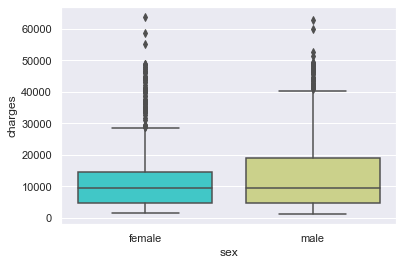

In [18]:
sns.boxplot(x = 'sex', y = 'charges', data = Ins, palette = 'rainbow')

*Female has more outliers and most of them(outliers) have paid higher charges. 
Male is right-skewed with more of them have paid higher charges.*


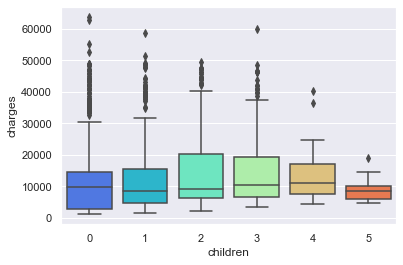

In [19]:
sns.boxplot(x = 'children', y = 'charges', data = Ins, palette = 'rainbow')

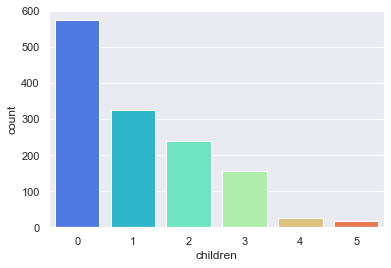

In [20]:
sns.countplot(x = 'children', data = Ins, palette = 'rainbow')

*From above two plots we found that more customers does not have a child and they have paid higher charges. Very few custmers have 4 or 5 children.*

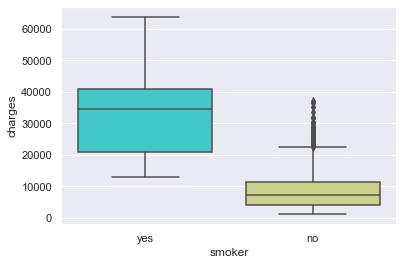

In [21]:
sns.boxplot(x = 'smoker', y = 'charges', data = Ins, palette = 'rainbow')

*Smokers pays higher charges than non-smokers. Non-smoker has some outliers who pays higher charges.*

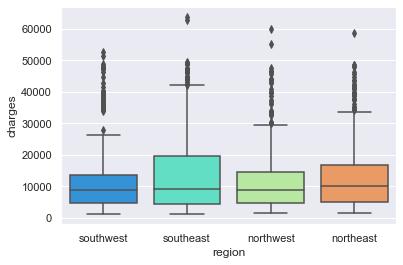

In [22]:
sns.boxplot(x = 'region', y = 'charges', data = Ins, palette = 'rainbow')

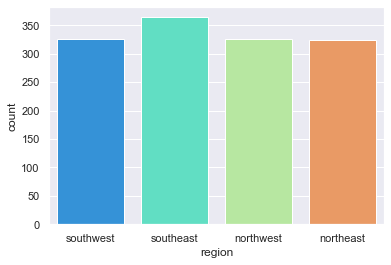

In [23]:
sns.countplot(x = 'region', data = Ins, palette = 'rainbow')

*From above two plots we can say that all the regions are evenly distributed. More customers from southeast region have paid higher charges than other regions.*

**3.i) Pair plot that includes all the columns of the data frame**

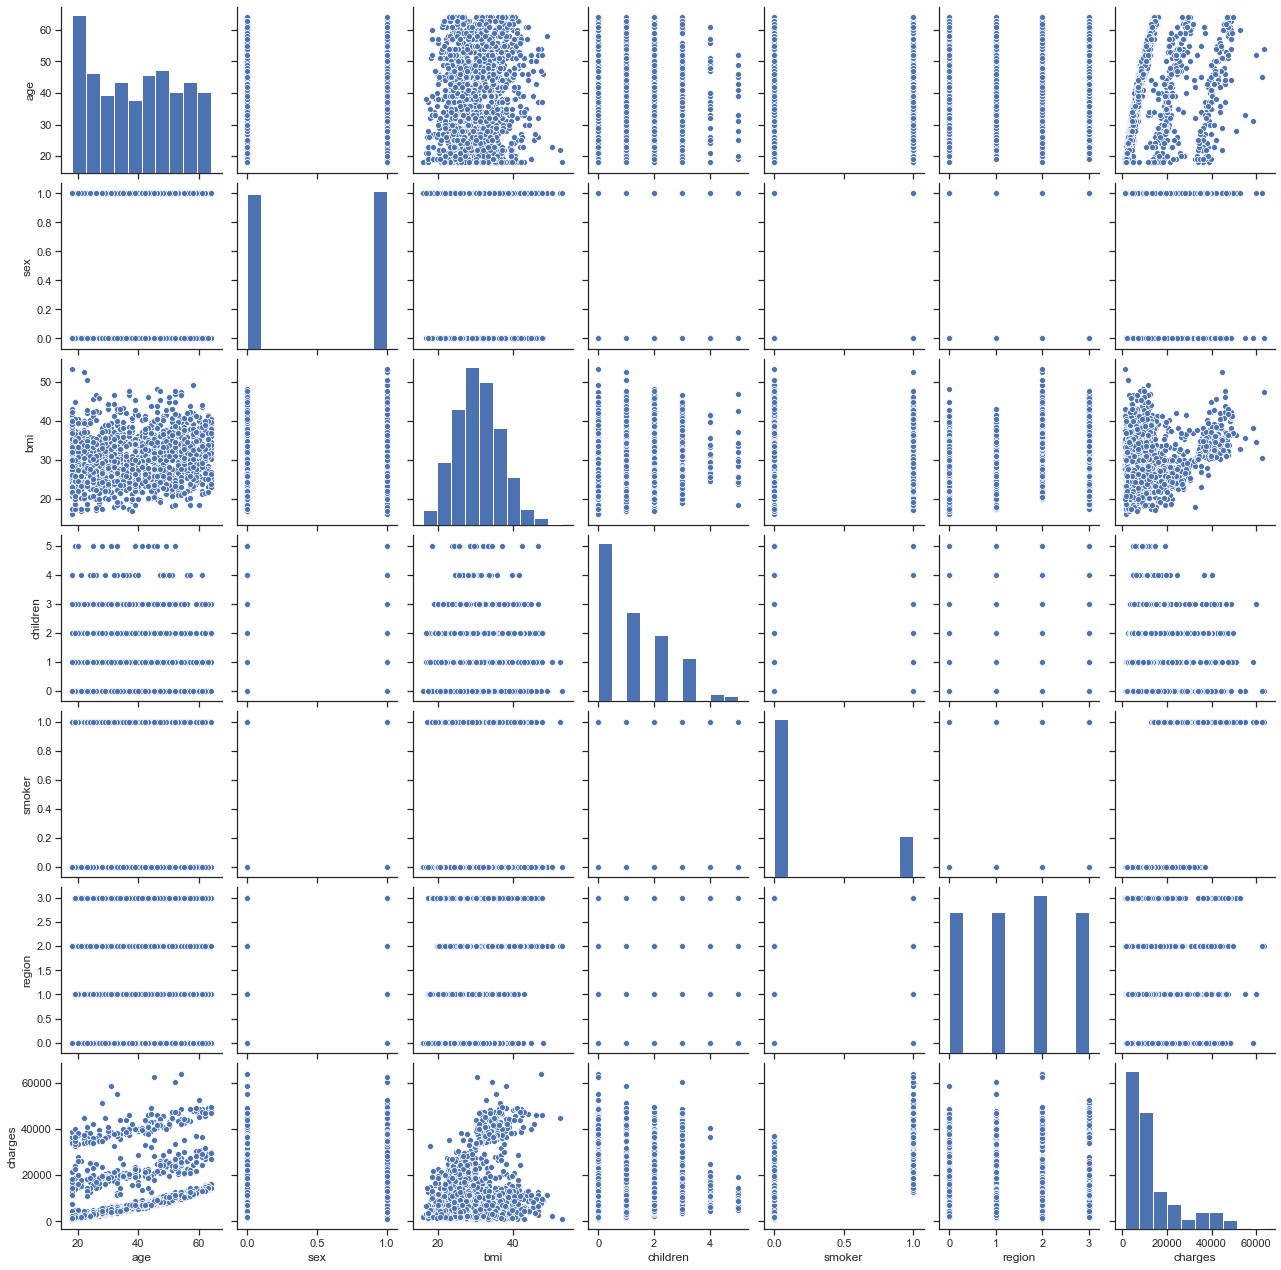

In [24]:
#encoding the catogorical variables because pair plot only takes numerical data.
dfDummies = Ins.copy(deep=True)

sex_encoder = LabelEncoder().fit(dfDummies['sex'])
dfDummies['sex'] = sex_encoder.transform(dfDummies['sex'])

smoker_encoder = LabelEncoder().fit(dfDummies['smoker'])
dfDummies['smoker'] = smoker_encoder.transform(dfDummies['smoker'])

region_encoder = LabelEncoder().fit(dfDummies['region'])
dfDummies['region'] = region_encoder.transform(dfDummies['region'])

dfDummies

sns.set(style="ticks", color_codes=True)
sns.pairplot(dfDummies) #pairplot
plt.show()

**4.a) Do charges of people who smoke differ significantly from the
people who don't?**

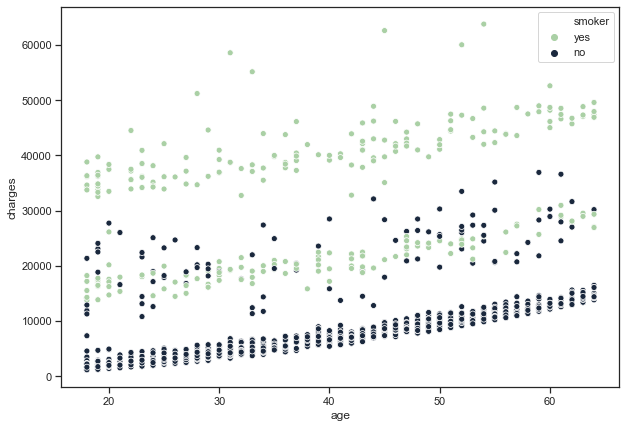

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', palette='ch:r=-.5,l=.75', data = Ins)

*In above plot we can see that there is signifiant difference in charges between smoker and non-smoker.*

Performing an independent T-test to see the impact of smoking on the charges.


**Null hypothesis (Ho)** : charges of smoker and non-smoker are same

**Alternate hypothesis (Ha)** : charges of smoker and non-smoker are different

In [26]:
from scipy.stats import ttest_ind

alpha = 0.05   # Let's consider a significance level of 5%

t_stats, p_value = ttest_ind(Ins.charges[Ins.smoker == 'yes'],Ins.charges[Ins.smoker == 'no'])
print("p_value : ", p_value)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

p_value :  8.271435842177219e-283
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


*From the test we found there is significant difference in the charges paid by the smokers and non-smokers.*

*Smokers pays higher charges than the non-smokers.*

**4.b) Does bmi of males differ significantly from that of females?**

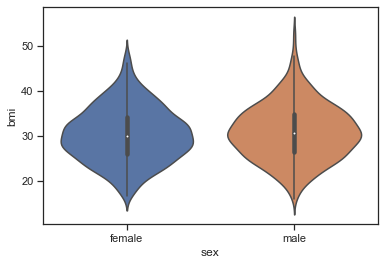

In [27]:
sns.violinplot(Ins['sex'], Ins['bmi'])


*In above plot we can see that there is very slight difference in bmi of male and female.*

Performing an independent T-test to see the impact of bmi on the gender.

**Null hypothesis (Ho)** : bmi of male and female is same

**Alternate hypothesis (Ha)** : bmi of male and female is different

In [28]:
alpha = 0.05   # Let's consider a significance level of 5%

t_stats, p_value = ttest_ind(Ins.bmi[Ins.sex == 'male'],Ins.bmi[Ins.sex == 'female'])
print("p_value : ", p_value)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and, we fail to reject the Null hypothesis''')

p_value :  0.08997637178984932
	 Since the p-value, 0.09 > 0.05 (alpha) the difference is not significant and, we fail to reject the Null hypothesis


*There is no significant difference in bmi of male and female.*

**4.c) Is the proportion of smokers significantly different in different
genders?**

Performing an Chi-Square test to see the impact of smoking as per the gender.

**Null hypothesis (Ho)** : there is no impact of smoking habit on gender

**Alternate hypothesis (Ha)** : there is impact of smoking habit on gender

In [29]:
alpha = 0.05   # Let's consider a significance level of 5%

crosstab = pd.crosstab(Ins['sex'],Ins['smoker']) 
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(crosstab)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and  we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and  we fail to reject the Null hypothesis''')

Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1
Since the p-value, 0.007 < 0.05 (alpha) the difference is significant and  we reject the Null hypothesis


*Rejecting the null hypothysis, we can conclude that the smoking habits are different in different genders.*

**4.d) Is the distribution of bmi across women with no children, one child
and two children, the same?**

Performing anova one-way test to check the impact of bmi in women 

**Null hypothesis (Ho)** : No. of children has no impact on female bmi   

**Alternate hypothesis (Ha)** : No. of children has an impact on female bmi

In [30]:
from scipy.stats import f_oneway

alpha = 0.05   # Let's consider a significance level of 5%

female = Ins[Ins.sex=='female'].copy(deep=True) #extracting female data from the dataset

zero = female[female.children==0]['bmi']
one = female[female.children==1]['bmi']
two = female[female.children==2]['bmi']

stat, p_value = f_oneway(zero, one, two)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and, we fail to reject the Null hypothesis''')




Since the p-value, 0.716 > 0.05 (alpha) the difference is not significant and, we fail to reject the Null hypothesis


*Accepting null hypothysis, We found that number of children does not impact on female bmi.* 